In [1]:
import pandas as pd
import pickle
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneOut
import numpy as np
from itertools import combinations
from tqdm import tqdm
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from adjustText import adjust_text
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open("data/dict_of_dfs.pickle", "rb") as handle:
    dict_of_dfs = pickle.load(handle)

/home/drussellmrichie/anaconda3/lib/python3.6/site-packages/pandas/core/indexes/base.py:162: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return cls.__new__(cls, **d)


In [3]:
domains = ['trait', 'risk', 'people', 'food', 'occupation', 'brand', 'good']

dims = [('masculine', 'feminine'),
       ('dread-inducing', 'unknowable'),
       ('warm', 'competent'),
       ('tasty', 'nutritious'),
       ('significance', 'autonomy'),
       ('sincere', 'exciting'),
       ('hedonic', 'utilitarian')]

flattened_dims = [dim for dim_pair in dims for dim in dim_pair]

# Individual-level mapping and similarity model LOO correlations

In [4]:
all_participant_rs_df_stacked = pd.read_csv('results/individual-level_mapping_model_results.csv')
all_participant_rs_df_stacked.drop('participant_number', axis='columns', inplace=True)
all_participant_rs_df_stacked.columns = ['Judgment', 'Score']
all_participant_rs_df_stacked = all_participant_rs_df_stacked[['Judgment', 'Score']]
all_participant_rs_df_stacked['Measure'] = 'Individual-level mapping model'
all_participant_rs_df_stacked = all_participant_rs_df_stacked.set_index('Judgment').loc[flattened_dims].reset_index()
all_participant_rs_df_stacked.head()

,Judgment,Score,Measure
0,masculine,0.430598,Individual-level mapping model
1,masculine,0.567024,Individual-level mapping model
2,masculine,0.544373,Individual-level mapping model
3,masculine,0.405248,Individual-level mapping model
4,masculine,0.258267,Individual-level mapping model


In [5]:
all_participant_similarity_rs_df_stacked = pd.read_csv('results/individual-level_similarity_model_results.csv', index_col=0)
all_participant_similarity_rs_df_stacked.drop('participant_number', axis='columns', inplace=True)
all_participant_similarity_rs_df_stacked.columns = ['Judgment', 'Score']
all_participant_similarity_rs_df_stacked = all_participant_similarity_rs_df_stacked[['Judgment', 'Score']]
all_participant_similarity_rs_df_stacked['Measure'] = 'Individual-level similarity model'
all_participant_similarity_rs_df_stacked = all_participant_similarity_rs_df_stacked.set_index('Judgment').loc[flattened_dims].reset_index()
all_participant_similarity_rs_df_stacked.head()

,Judgment,Score,Measure
0,masculine,0.150559,Individual-level similarity model
1,masculine,0.249504,Individual-level similarity model
2,masculine,0.204821,Individual-level similarity model
3,masculine,0.203413,Individual-level similarity model
4,masculine,0.075417,Individual-level similarity model


# Average of pairwise correlations

In [6]:
all_pairwise_rs = []
for domain, dim_pair in tqdm(zip(domains, dims)):
    df = dict_of_dfs[domain]
    for dim in dim_pair:
        dim_rs = []
        judgments = df[dim]
        for part1, part2 in combinations(judgments.index, r=2):
            judg1 = judgments.loc[part1].apply(float)
            judg2 = judgments.loc[part2].apply(float)
            nas = np.logical_or(np.isnan(judg1), np.isnan(judg2))
            r, _ = pearsonr(judg1[~nas], judg2[~nas])
            dim_rs.append(r)

        all_pairwise_rs.append([dim] + dim_rs)
all_pairwise_rs = pd.DataFrame(all_pairwise_rs)#, columns=['judgment_dimension','average_split-half_reliability'])
all_pairwise_rs

7it [00:18,  2.70s/it]


,0,1,2,3,4,5,6,7,8,9,...,1026,1027,1028,1029,1030,1031,1032,1033,1034,1035
0,masculine,0.452515,0.580093,0.317124,0.169403,0.534716,0.442817,0.444187,0.427511,0.405123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,feminine,0.572101,0.546206,0.440997,0.183537,0.562899,0.363655,0.373293,0.288434,0.542883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,dread-inducing,0.400732,0.594591,0.675552,0.748656,0.676132,0.762897,0.671190,0.495498,0.622107,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unknowable,0.353815,0.536296,0.602287,0.404204,0.546504,0.350170,0.499097,0.429680,0.524074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,warm,0.541672,0.462500,0.557104,0.648158,0.581635,0.582680,0.666377,0.589401,0.455605,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,competent,0.587227,0.184813,0.387894,0.394084,0.551772,0.560973,0.280076,0.492932,0.285920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tasty,0.283929,-0.064638,0.213143,0.342516,-0.178236,0.295175,0.154566,0.271300,0.095586,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nutritious,0.370411,0.340981,0.396049,0.478570,0.045111,0.489326,0.361469,0.358109,0.313026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,significance,0.388920,0.245896,0.559174,0.495674,0.466543,0.504981,0.344639,0.316244,0.043498,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,autonomy,0.527956,0.081535,0.164236,0.425497,0.416555,0.457481,0.428733,0.462908,0.127051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
all_pairwise_rs.index = all_pairwise_rs[0].values
all_pairwise_rs.drop(0, axis='columns', inplace=True)
all_pairwise_rs = all_pairwise_rs.stack().reset_index()
all_pairwise_rs.columns = ['Judgment', 'Pair or participant number', 'Score']
all_pairwise_rs.drop('Pair or participant number', axis='columns', inplace=True)
all_pairwise_rs['Measure'] = "Pairwise correlations"
all_pairwise_rs.dropna(inplace=True)
all_pairwise_rs.head()

,Judgment,Score,Measure
0,masculine,0.452515,Pairwise correlations
1,masculine,0.580093,Pairwise correlations
2,masculine,0.317124,Pairwise correlations
3,masculine,0.169403,Pairwise correlations
4,masculine,0.534716,Pairwise correlations


# One-vs-rest reliability, aka inter-subject correlation (IS-r)

In [8]:
isrs = []
for domain, dim_pair in zip(domains, dims):
    df = dict_of_dfs[domain]
    for dim in dim_pair:
        dim_rs = []
        judgments = df[dim]
        X = judgments.values
        loo = LeaveOneOut()
        for rest_index, one_index in loo.split(X):
            rest_of_judgments = judgments.iloc[rest_index].mean()
            first_judgment    = judgments.iloc[one_index].mean()
            nas = np.logical_or(np.isnan(first_judgment), np.isnan(rest_of_judgments))
            r, _ = pearsonr(first_judgment[~nas], rest_of_judgments[~nas])
            dim_rs.append(r)
            
        isrs.append([dim] + dim_rs)
isrs = pd.DataFrame(isrs)#, columns=['judgment_dimension','average_split-half_reliability'])
isrs

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,masculine,0.669166,0.746290,0.677331,0.503132,0.234340,0.871745,0.619570,0.747925,0.597661,...,0.687993,0.763097,0.792494,0.755309,0.554648,0.837188,0.391347,0.218551,NaN,NaN
1,feminine,0.644324,0.720954,0.774435,0.688189,0.283338,0.851100,0.565196,0.708116,0.504773,...,0.718384,0.813030,0.860511,0.853743,0.575219,0.844723,0.447839,0.649424,NaN,NaN
2,dread-inducing,0.830658,0.466231,0.662802,0.759066,0.878708,0.822273,0.881747,0.790662,0.566211,...,0.741733,0.809070,0.847608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,unknowable,0.735435,0.352255,0.622001,0.698802,0.561905,0.678992,0.626520,0.655710,0.573909,...,0.521731,0.369209,0.834602,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,warm,0.785542,0.685125,0.437146,0.693671,0.796461,0.730253,0.770409,0.844535,0.703988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,competent,0.638935,0.670296,0.512889,0.527217,0.487819,0.624259,0.676329,0.367944,0.485615,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,tasty,0.260298,0.603528,0.319382,0.547354,0.619292,-0.118957,0.511987,0.356544,0.509536,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,nutritious,0.451236,0.796533,0.778191,0.890950,0.818445,0.010747,0.817656,0.785227,0.645767,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,significance,0.603695,0.775758,0.420903,0.752417,0.547561,0.817562,0.679587,0.669031,0.657626,...,0.722242,0.657559,0.570091,0.601350,0.635184,0.626765,NaN,NaN,NaN,NaN
9,autonomy,0.522838,0.753262,0.557779,0.528718,0.690475,0.783805,0.590537,0.763309,0.527557,...,0.703936,0.608860,0.740214,0.595027,0.822862,0.699233,NaN,NaN,NaN,NaN


In [9]:
isrs.index = isrs[0].values
isrs.drop(0, axis='columns', inplace=True)
isrs = isrs.stack().reset_index()
isrs.dropna(inplace=True)
isrs.columns = ['Judgment', 'Measure', 'Score']
isrs['Measure'] = "Inter-subject correlation"
isrs = isrs[['Judgment','Score','Measure']]
isrs.head()

,Judgment,Score,Measure
0,masculine,0.669166,Inter-subject correlation
1,masculine,0.746290,Inter-subject correlation
2,masculine,0.677331,Inter-subject correlation
3,masculine,0.503132,Inter-subject correlation
4,masculine,0.234340,Inter-subject correlation


# Visualizing all measures together

In [10]:
all_measures = pd.concat([all_participant_rs_df_stacked, all_participant_similarity_rs_df_stacked, all_pairwise_rs, isrs])
all_measures.head()

,Judgment,Score,Measure
0,masculine,0.430598,Individual-level mapping model
1,masculine,0.567024,Individual-level mapping model
2,masculine,0.544373,Individual-level mapping model
3,masculine,0.405248,Individual-level mapping model
4,masculine,0.258267,Individual-level mapping model


In [11]:
all_measures.tail()

,Judgment,Score,Measure
495,utilitarian,0.839687,Inter-subject correlation
496,utilitarian,0.811264,Inter-subject correlation
497,utilitarian,0.758178,Inter-subject correlation
498,utilitarian,0.877923,Inter-subject correlation
499,utilitarian,0.726031,Inter-subject correlation


In [12]:
all_measures.Judgment = all_measures.Judgment.apply(str.capitalize)

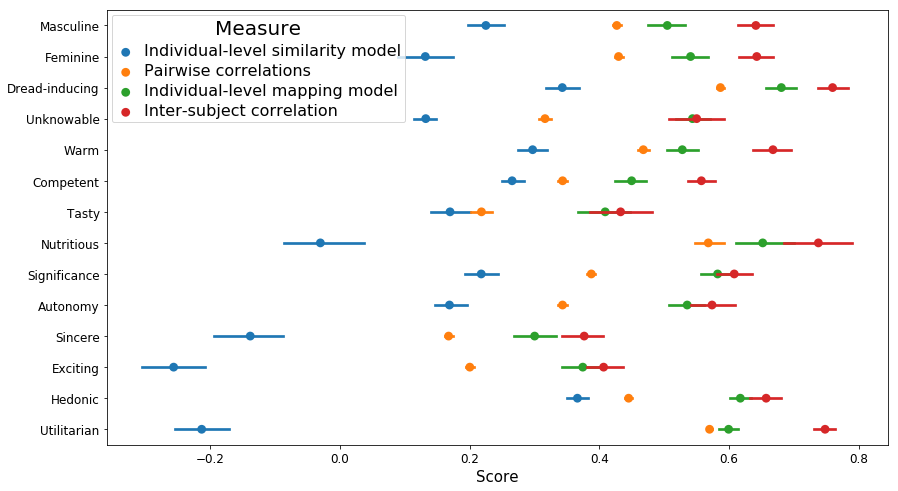

In [13]:
fig, ax = plt.subplots(figsize=(14, 8))

ascending_measures = ['Individual-level similarity model', 'Pairwise correlations', 
                      'Individual-level mapping model', 'Inter-subject correlation']
sns.pointplot(y="Judgment", x="Score", hue="Measure", data=all_measures, join=False, hue_order=ascending_measures, ax=ax, ci=68);

ax.set_xlabel('Score', fontsize=15)
ax.tick_params(labelsize=12)

# ax.set_ylabel('Judgment Dimension', fontsize=20)
ax.set_ylabel('', fontsize=20)

plt.setp(ax.get_legend().get_title(), fontsize='20')
plt.setp(ax.get_legend().get_texts(), fontsize='16') 

# plt.savefig('figures/reliability_mapping_and_similarity_scores_individual-level.png', pad_inches=10)
plt.savefig('figures/reliability_mapping_and_similarity_scores_individual-level.eps', format='eps', pad_inches=10)

In [14]:
# all_measures.Score = all_measures.Score.astype(float)

In [15]:
# r, p = pearsonr(x=all_measures.query("Measure == 'Mapping LOO correlation'").sort_values('Judgment').Score.values,
#          y=all_measures.query("Measure == 'Split-half reliability'").groupby('Judgment')['Score'].mean().values)
# print(r, p)